In [1]:
%pylab inline

Populating the interactive namespace from numpy and matplotlib


# Building a Robot Simulator in 2D

In [2]:
# Perfect sensor
def sense(x):
    return x

### Euler integration

In [3]:
def simulate(Δt, x, u):
    x += Δt * u
    return x

### Control policy

In [4]:
def control(t, y):
    ### WRITE YOUR CONTROL POLICY HERE:
    ux = t
    uy = sin(t)
    uz = cos(t)
    
    return array([ux, uy, uz])

## Explanation

To expand into 3 dimensions, I would need 3 velocities for each direction (x, y, z). I searched up the parametric equations for a helix.

### Running the simulator

In [5]:
tf = 50.
Δt = 0.1    # Time step
time = linspace(0.,tf, int(tf / Δt) + 1)  # Time interval


# Initial conditions
x = array([-0.5, 1, 0.5]) #Fix the starting position
x_log = [copy(x)]

for t in time:
    y = sense(x)
    u = control(t, y)    
    x = simulate(Δt, x, u)
    x_log.append(copy(x))
    #print (x_log)

x_log = array(x_log)
x = x_log[:,0]
y = x_log[:,1]
z = x_log[:,2]

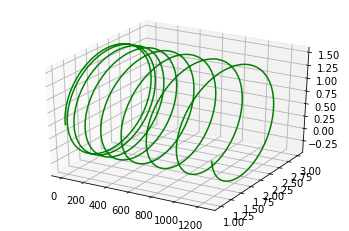

In [6]:
fig = plt.figure()
ax = plt.axes(projection='3d')
ax.plot(x, y, z, 'green');

## Explanation

Here, I made sure to that axis would be 3d and plotted (x,y,z)

In [ ]:
import matplotlib.pyplot as plt
from matplotlib import animation
from JSAnimation import IPython_display    
from IPython.display import HTML
    


fig, ax = plt.subplots()

def animate(t):
    ax.clear()
    
    # Path
    plot(x_log[:,0], x_log[:,1], x_log[:,2], 'r--')
    
    # Initial conditions
    plot(x_log[t,0], x_log[t,1], x_log[:,2], 'bo')
    
    

anim = animation.FuncAnimation(fig, animate, frames=len(time), interval=60)

HTML(anim.to_jshtml())